## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import pickle

## Data Collection and Processing

In [2]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


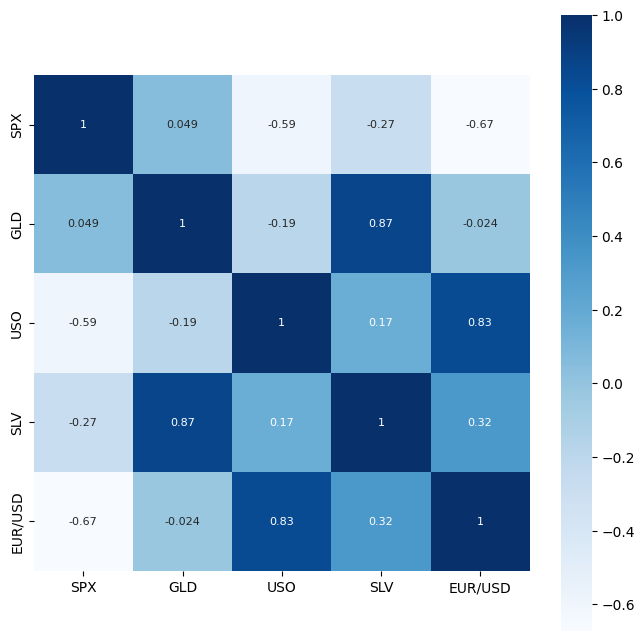

In [7]:
corelation = df.iloc[:,1:].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corelation,cbar=True, square=True, annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [8]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


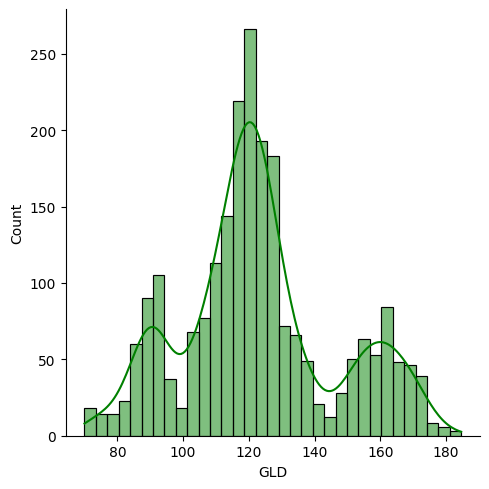

In [9]:
sns.displot(df['GLD'],color='green',kde=True)
plt.show()

In [10]:
X = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Training Data in 6 Regression Model 

In [12]:
estimators = [('LinearR',LinearRegression()),
              ('Random Forest',RandomForestRegressor(n_estimators=100,random_state=42)),
              ('XGBoost',XGBRegressor()),
              ('GradientBR',GradientBoostingRegressor()),
             ('Lasso',Lasso()),
             ('Ridge',Ridge(alpha=0.001, max_iter=500,solver='sparse_cg'))]
print("<------- All model accuracy score ------->")
print("="*50)
for estimator in estimators:
    model = estimator[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    result = r2_score(y_test,y_pred)
    print(estimator[0],"----->",result)

<------- All model accuracy score ------->
LinearR -----> 0.8975640982991402
Random Forest -----> 0.9900245384549384
XGBoost -----> 0.9885715958139172
GradientBR -----> 0.9802456942009968
Lasso -----> 0.896385509488709
Ridge -----> 0.8969146295165461


## Finally we use Random Forest Model

In [13]:
X = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
regressor = RandomForestRegressor(n_estimators=100,random_state=42)

In [16]:
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Model Evaluation
y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.9900245384549384

## Compare the Actual Values and Predicted Values in plot

In [18]:
y_test = list(y_test)

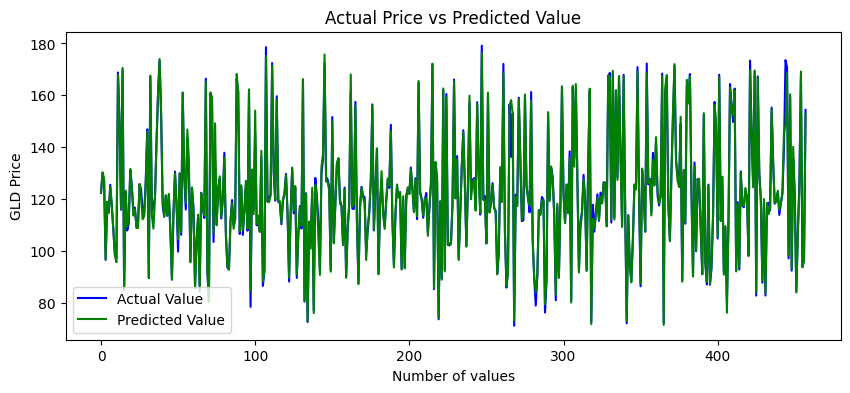

In [19]:
plt.figure(figsize=(10,4))
plt.plot(y_test,color='b',label='Actual Value')
plt.plot(y_pred,color='g',label='Predicted Value')
plt.title("Actual Price vs Predicted Value")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

## Testing 

In [20]:
user_input = [1390.189941,76059998,15.590,1.557099]
array = np.asarray(user_input)
reshape = array.reshape(1,-1)
result = regressor.predict(reshape)
result

array([85.50000019])

## Model Dumping

In [21]:
pickle.dump(regressor,open("gold.pkl","wb"))